In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from alpha_vantage.timeseries import TimeSeries
API_key = 'K56HGJRMWJDRYFNH'

ts = TimeSeries(key = API_key,output_format='pandas')

data = ts.get_daily('AAPL')
data[0]
        

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2024-07-30,219.19,220.325,216.12,218.80,41643840.0
2024-07-29,216.96,219.300,215.75,218.24,36311778.0
2024-07-26,218.70,219.490,216.01,217.96,41601345.0
2024-07-25,218.93,220.850,214.62,217.49,51391199.0
2024-07-24,224.00,224.800,217.13,218.54,61777576.0
...,...,...,...,...,...
2024-03-13,172.77,173.185,170.76,171.13,51948951.0
2024-03-12,173.15,174.030,171.01,173.23,59544927.0
2024-03-11,172.94,174.380,172.05,172.75,58929918.0


In [3]:
import requests
import pandas as pd
import time

api_key = 'K56HGJRMWJDRYFNH'
symbols = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'FB']
base_url = 'https://www.alphavantage.co/query'

def fetch_data(symbol):
    params = {
        'function': 'TIME_SERIES_DAILY',
        'symbol': symbol,
        'apikey': api_key,
        'outputsize': 'compact'
    }
    response = requests.get(base_url, params=params)
    data = response.json()
    time_series = data.get('Time Series (Daily)', {})
    df = pd.DataFrame.from_dict(time_series, orient='index').sort_index()
    df = df.astype(float)
    df['symbol'] = symbol
    return df

# Collect data for each symbol
data_frames = [fetch_data(symbol) for symbol in symbols]
all_data = pd.concat(data_frames)

# Convert index to datetime
all_data.index = pd.to_datetime(all_data.index)
all_data.reset_index(inplace=True)
all_data.rename(columns={'index': 'date'}, inplace=True)

print(all_data.head())


        date  1. open  2. high  3. low  4. close   5. volume symbol
0 2024-03-07   169.15  170.730  168.49    169.00  71765061.0   AAPL
1 2024-03-08   169.00  173.700  168.94    170.73  76267041.0   AAPL
2 2024-03-11   172.94  174.380  172.05    172.75  58929918.0   AAPL
3 2024-03-12   173.15  174.030  171.01    173.23  59544927.0   AAPL
4 2024-03-13   172.77  173.185  170.76    171.13  51948951.0   AAPL


In [4]:
all_data

,date,1. open,2. high,3. low,4. close,5. volume,symbol
0,2024-03-07,169.15,170.7300,168.49,169.00,71765061.0,AAPL
1,2024-03-08,169.00,173.7000,168.94,170.73,76267041.0,AAPL
2,2024-03-11,172.94,174.3800,172.05,172.75,58929918.0,AAPL
3,2024-03-12,173.15,174.0300,171.01,173.23,59544927.0,AAPL
4,2024-03-13,172.77,173.1850,170.76,171.13,51948951.0,AAPL
...,...,...,...,...,...,...,...
395,2024-07-24,183.20,185.4500,180.41,180.83,41532360.0,AMZN
396,2024-07-25,182.91,183.8958,176.80,179.85,44464163.0,AMZN
397,2024-07-26,180.39,183.1900,180.24,182.50,29505964.0,AMZN
398,2024-07-29,183.84,184.7500,182.38,183.20,33270123.0,AMZN


In [5]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       400 non-null    datetime64[ns]
 1   1. open    400 non-null    float64       
 2   2. high    400 non-null    float64       
 3   3. low     400 non-null    float64       
 4   4. close   400 non-null    float64       
 5   5. volume  400 non-null    float64       
 6   symbol     400 non-null    object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 22.0+ KB


In [6]:
all_data.head(390)

,date,1. open,2. high,3. low,4. close,5. volume,symbol
0,2024-03-07,169.150,170.7300,168.4900,169.00,71765061.0,AAPL
1,2024-03-08,169.000,173.7000,168.9400,170.73,76267041.0,AAPL
2,2024-03-11,172.940,174.3800,172.0500,172.75,58929918.0,AAPL
3,2024-03-12,173.150,174.0300,171.0100,173.23,59544927.0,AAPL
4,2024-03-13,172.770,173.1850,170.7600,171.13,51948951.0,AAPL
...,...,...,...,...,...,...,...
385,2024-07-10,199.995,200.1100,197.6900,199.79,32883753.0,AMZN
386,2024-07-11,200.090,200.2699,192.8600,195.05,44565041.0,AMZN
387,2024-07-12,194.800,196.4700,193.8301,194.49,30598525.0,AMZN
388,2024-07-15,194.560,196.1900,190.8300,192.72,40683227.0,AMZN


In [7]:
# Feature engineering
def preprocess_data(df):
    df['daily_return'] = df['4. close'].pct_change()
    df['volatility'] = df['daily_return'].rolling(window=20).std()
    df['momentum'] = df['4. close'].pct_change(periods=5)
    df.dropna(inplace=True)
    return df

processed_data = all_data.groupby('symbol').apply(preprocess_data).reset_index(drop=True)
print(processed_data.head())


        date  1. open  2. high  3. low  4. close   5. volume symbol  \
0 2024-04-05   169.59   170.39  168.95    169.58  41975776.0   AAPL   
1 2024-04-08   169.03   169.20  168.24    168.45  37216858.0   AAPL   
2 2024-04-09   168.70   170.08  168.35    169.67  42231444.0   AAPL   
3 2024-04-10   168.80   169.09  167.11    167.78  49709336.0   AAPL   
4 2024-04-11   168.34   175.46  168.16    175.04  91070275.0   AAPL   

   daily_return  volatility  momentum  
0      0.004502    0.013619 -0.011080  
1     -0.006664    0.013491 -0.009292  
2      0.007243    0.013306  0.004916  
3     -0.011139    0.013472 -0.011023  
4      0.043271    0.016523  0.036844  


In [8]:
import heapq

def a_star_search(data, start_date, end_date):
    data = data[(data['date'] >= start_date) & (data['date'] <= end_date)]
    stocks = data['symbol'].unique()
    
    def heuristic(stock):
        stock_data = data[data['symbol'] == stock]
        return stock_data['daily_return'].mean() / stock_data['volatility'].mean()
    
    open_set = [(0, stock) for stock in stocks]
    heapq.heapify(open_set)
    
    best_stock = None
    best_score = float('-inf')
    
    while open_set:
        _, current_stock = heapq.heappop(open_set)
        score = heuristic(current_stock)
        if score > best_score:
            best_score = score
            best_stock = current_stock
    
    return best_stock

best_stock = a_star_search(processed_data, '2024-03-07', '2024-07-30')
print(f"Best stock to trade based on A* search: {best_stock}")


Best stock to trade based on A* search: AAPL


In [9]:
def greedy_search(data):
    latest_data = data[data['date'] == data['date'].max()]
    best_stock = latest_data.loc[latest_data['daily_return'].idxmax()]
    return best_stock

best_stock = greedy_search(processed_data)
print(f"Best stock to trade: {best_stock['symbol']} with expected return: {best_stock['daily_return']}")


Best stock to trade: GOOGL with expected return: 0.004482982363003485


In [10]:
def backtest(data, stock, start_date, end_date):
    stock_data = data[(data['symbol'] == stock) & (data['date'] >= start_date) & (data['date'] <= end_date)]
    cumulative_return = (1 + stock_data['daily_return']).cumprod().iloc[-1] - 1
    return cumulative_return

greedy_stock = greedy_search(processed_data)['symbol']
a_star_stock = a_star_search(processed_data, '2024-03-07', '2024-07-30')

greedy_return = backtest(processed_data, greedy_stock, '2024-03-07', '2024-07-30')
a_star_return = backtest(processed_data, a_star_stock, '2024-03-07', '2024-07-30')

print(f"Greedy Search Return: {greedy_return}")
print(f"A* Search Return: {a_star_return}")


Greedy Search Return: 0.13126951438251333
A* Search Return: 0.29605496979030854


In [14]:
from sklearn.ensemble import RandomForestRegressor
import heapq

# Train a machine learning model to predict daily returns
def train_ml_model(data):
    features = ['1. open', '2. high', '3. low', '4. close', '5. volume', 'volatility', 'momentum']
    X = data[features]
    y = data['daily_return']
    model = RandomForestRegressor()
    model.fit(X, y)
    return model

model = train_ml_model(processed_data)

def ml_informed_a_star_search(data, model, start_date, end_date):
    data = data[(data['date'] >= start_date) & (data['date'] <= end_date)]
    stocks = data['symbol'].unique()
    features = ['1. open', '2. high', '3. low', '4. close', '5. volume', 'volatility', 'momentum']
    
    def heuristic(stock):
        stock_data = data[data['symbol'] == stock].copy()
        stock_data['predicted_return'] = model.predict(stock_data[features])
        return stock_data['predicted_return'].mean() / stock_data['volatility'].mean()
    
    open_set = [(0, stock) for stock in stocks]
    heapq.heapify(open_set)
    
    best_stock = None
    best_score = float('-inf')
    
    while open_set:
        _, current_stock = heapq.heappop(open_set)
        score = heuristic(current_stock)
        if score > best_score:
            best_score = score
            best_stock = current_stock
    
    best_stock_data = data[data['symbol'] == best_stock].copy()
    best_stock_data['predicted_return'] = model.predict(best_stock_data[features])
    return best_stock_data.iloc[-1]

best_stock_ml_a_star = ml_informed_a_star_search(processed_data, model, '2024-03-07', '2024-07-30')
print(f"Best stock to trade (ML-informed A* Search): {best_stock_ml_a_star['symbol']} with predicted return: {best_stock_ml_a_star['predicted_return']}")


Best stock to trade (ML-informed A* Search): AAPL with predicted return: 0.001697191890995311


In [15]:
def backtest(data, stock, model, start_date, end_date):
    stock_data = data[(data['symbol'] == stock) & (data['date'] >= start_date) & (data['date'] <= end_date)].copy()
    features = ['1. open', '2. high', '3. low', '4. close', '5. volume', 'volatility', 'momentum']
    stock_data['predicted_return'] = model.predict(stock_data[features])
    stock_data['strategy_return'] = stock_data['predicted_return'].shift(1)
    stock_data['cumulative_strategy_return'] = (1 + stock_data['strategy_return']).cumprod()
    stock_data['cumulative_buy_and_hold_return'] = (1 + stock_data['daily_return']).cumprod()
    return stock_data

# Backtest the ML-informed A* Search strategy
backtest_result = backtest(processed_data, best_stock_ml_a_star['symbol'], model, '2024-03-07', '2024-07-30')

print(backtest_result[['date', 'cumulative_strategy_return', 'cumulative_buy_and_hold_return']].tail())


         date  cumulative_strategy_return  cumulative_buy_and_hold_return
75 2024-07-24                    1.344526                        1.294515
76 2024-07-25                    1.311056                        1.288295
77 2024-07-26                    1.301821                        1.291079
78 2024-07-29                    1.302265                        1.292738
79 2024-07-30                    1.303596                        1.296055


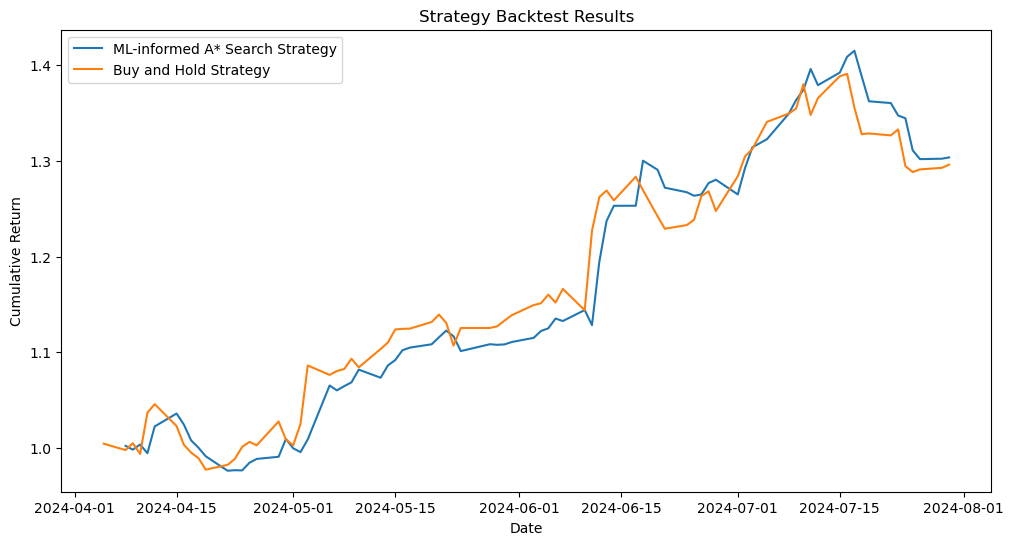

In [16]:
import matplotlib.pyplot as plt

def plot_backtest_results(backtest_result):
    plt.figure(figsize=(12, 6))
    plt.plot(backtest_result['date'], backtest_result['cumulative_strategy_return'], label='ML-informed A* Search Strategy')
    plt.plot(backtest_result['date'], backtest_result['cumulative_buy_and_hold_return'], label='Buy and Hold Strategy')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    plt.title('Strategy Backtest Results')
    plt.legend()
    plt.show()

plot_backtest_results(backtest_result)


In [17]:
def calculate_performance_metrics(backtest_result):
    strategy_final_return = backtest_result['cumulative_strategy_return'].iloc[-1]
    buy_and_hold_final_return = backtest_result['cumulative_buy_and_hold_return'].iloc[-1]
    
    strategy_annual_return = (1 + strategy_final_return) ** (252 / len(backtest_result)) - 1
    buy_and_hold_annual_return = (1 + buy_and_hold_final_return) ** (252 / len(backtest_result)) - 1
    
    strategy_volatility = backtest_result['strategy_return'].std() * (252 ** 0.5)
    buy_and_hold_volatility = backtest_result['daily_return'].std() * (252 ** 0.5)
    
    strategy_sharpe_ratio = strategy_annual_return / strategy_volatility
    buy_and_hold_sharpe_ratio = buy_and_hold_annual_return / buy_and_hold_volatility
    
    return {
        'Strategy Final Return': strategy_final_return,
        'Buy and Hold Final Return': buy_and_hold_final_return,
        'Strategy Annual Return': strategy_annual_return,
        'Buy and Hold Annual Return': buy_and_hold_annual_return,
        'Strategy Volatility': strategy_volatility,
        'Buy and Hold Volatility': buy_and_hold_volatility,
        'Strategy Sharpe Ratio': strategy_sharpe_ratio,
        'Buy and Hold Sharpe Ratio': buy_and_hold_sharpe_ratio,
    }

metrics = calculate_performance_metrics(backtest_result)
print(metrics)


{'Strategy Final Return': 1.3035956786628546, 'Buy and Hold Final Return': 1.2960549697903085, 'Strategy Annual Return': 12.854144203416812, 'Buy and Hold Annual Return': 12.711791034184339, 'Strategy Volatility': 0.23025851428668925, 'Buy and Hold Volatility': 0.27103035602186737, 'Strategy Sharpe Ratio': 55.82483776218773, 'Buy and Hold Sharpe Ratio': 46.901724296737896}
